<a href="https://colab.research.google.com/github/srijarayikanti/music-recommedation-system/blob/main/Music_recommendatio_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from google.colab import files


uploaded = files.upload()


Saving spotify_songs.csv to spotify_songs (2).csv


In [9]:
import io
ds = pd.read_csv(io.BytesIO(uploaded['spotify_songs (2).csv']))
print(ds)

                     track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City Of Lights - Official Radio Edit 

In [10]:
ds.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


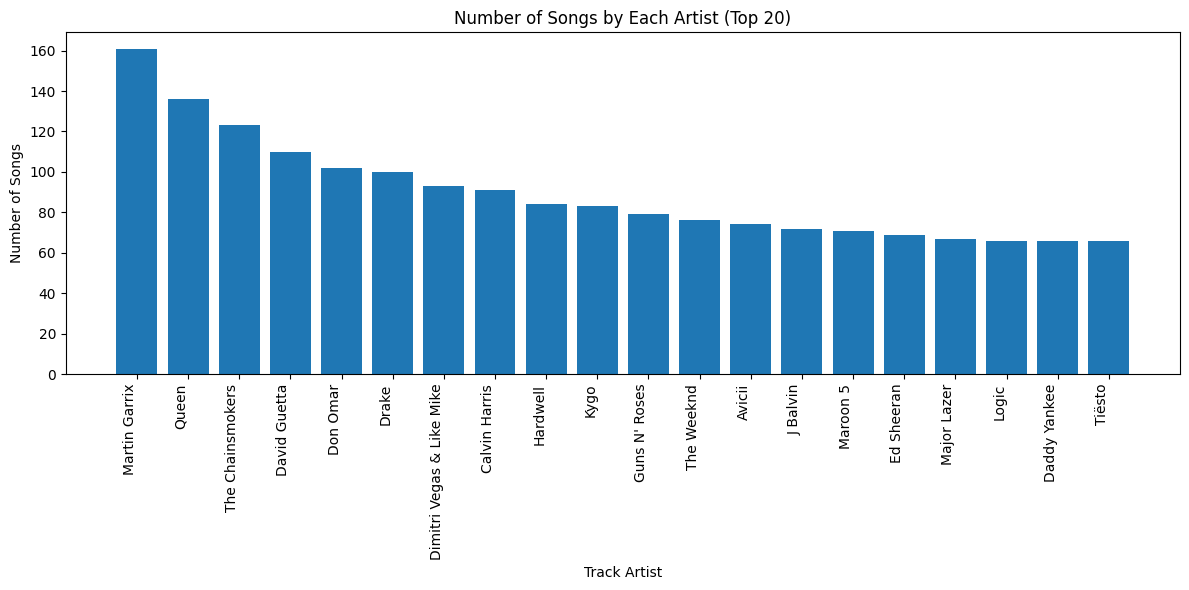

In [11]:
df=ds
artist_song_counts=df.groupby('track_artist')['track_name'].count().reset_index()
artist_song_counts.rename(columns={'track_name': 'no_of_songs'}, inplace=True)
# Sort by number of songs in descending order
artist_song_counts = artist_song_counts.sort_values(by='no_of_songs', ascending=False)

# Select the top N artists (adjust N as needed)
top_n_artists = artist_song_counts.head(20)  # Example: Top 20 artists

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(top_n_artists['track_artist'], top_n_artists['no_of_songs'])
plt.xlabel('Track Artist')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Each Artist (Top 20)')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

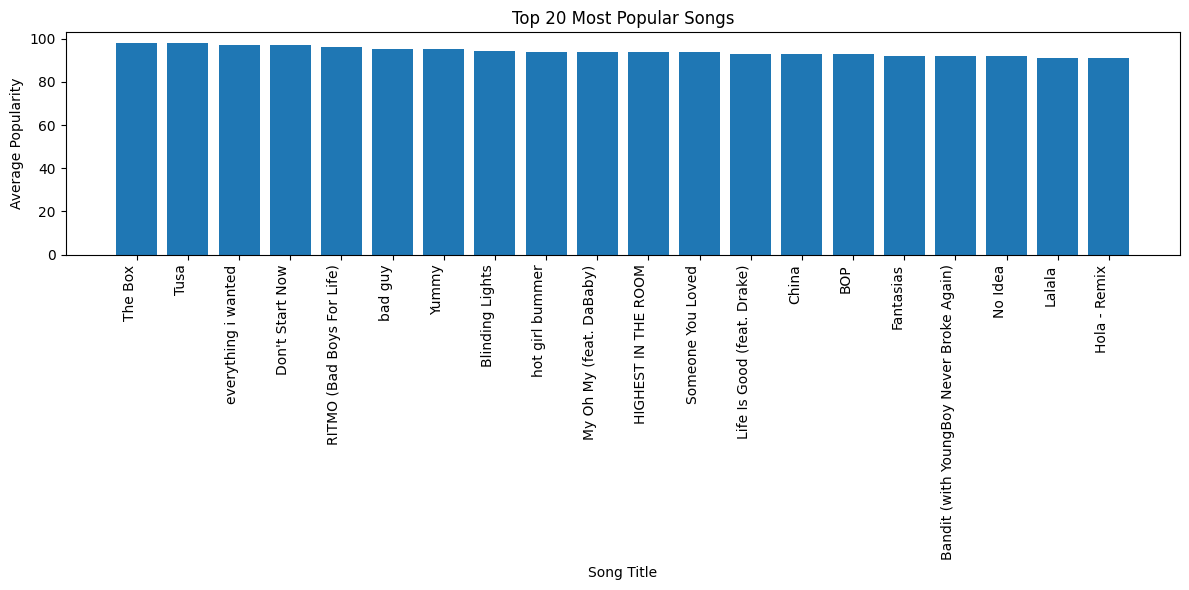

In [13]:
song_popularity = df.groupby('track_name')['track_popularity'].mean().reset_index()

# Sort by popularity in descending order
song_popularity = song_popularity.sort_values(by='track_popularity', ascending=False)

# Select the top N songs (adjust N as needed)
top_n_songs = song_popularity.head(20)  # Example: Top 20 songs

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_n_songs['track_name'], top_n_songs['track_popularity'])
plt.xlabel('Song Title')
plt.ylabel('Average Popularity')
plt.title('Top 20 Most Popular Songs')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create a TF-IDF vectorizer for song features
vectorizer = TfidfVectorizer()
scaler = MinMaxScaler() # Create a MinMaxScaler object
scaled_features = scaler.fit_transform(df[features])

# Convert each row of the DataFrame to a string representation
feature_strings = df[features].apply(lambda row: ' '.join(row.astype(str)), axis=1)

# Fit and transform the vectorizer on the string representations
feature_matrix = vectorizer.fit_transform(feature_strings)


cosine_sim = cosine_similarity(feature_matrix)

def get_recommendations(song_title, top_n=10):
    """
    Recommends songs similar to the given song title.

    Args:
        song_title (str): The title of the song to base recommendations on.
        top_n (int): The number of recommendations to return.

    Returns:
        pandas.DataFrame: A DataFrame containing the recommended songs.
    """
    # Get the index of the song
    song_index = df[df['track_name'] == song_title].index[0]

    # Get similarity scores for the song
    sim_scores = list(enumerate(cosine_sim[song_index]))

    # Sort scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top N similar songs (excluding the input song)
    sim_scores = sim_scores[1:top_n + 1]

    # Get the song indices
    song_indices = [i[0] for i in sim_scores]

    # Return the recommended songs
    return df.iloc[song_indices][['track_name', 'track_artist']]

# Example usage:
recommendations = get_recommendations("The Box", top_n=5)
print(recommendations)